In [1]:
import pandas as pd
import numpy as np
df = pd.read_pickle("./waferImg26x26.pkl")
images = df.images.values
labels = df.labels.values
labels = np.asarray([str(l[0]) for l in labels])

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df

,images,labels
0,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]
1,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]
2,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]
3,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]
4,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]
...,...,...
14361,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]
14362,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]
14363,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]
14364,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",[none]


In [4]:
images.shape

(14366,)

In [5]:
images[0].shape

(3, 26, 26)

In [6]:
image = images[0]
print(image.T.shape)

(26, 26, 3)


In [7]:
image

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

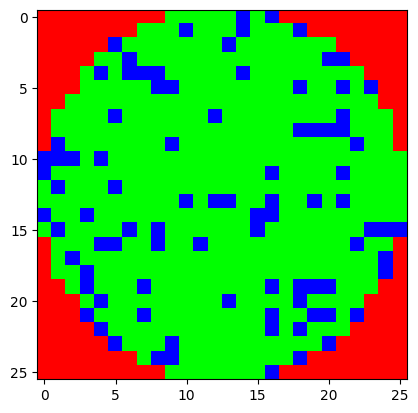

In [8]:
import matplotlib.pyplot as plt

plt.imshow(image.T)

In [9]:
df['labels_items'] = df['labels'].apply(lambda x : x[0])

<Axes: >

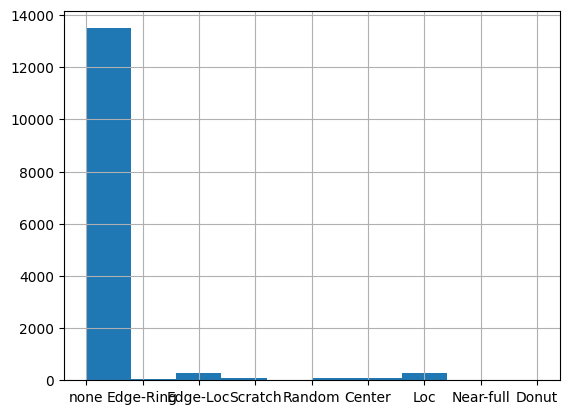

In [19]:
df.labels_items.hist()

In [11]:
df_donut = df[df['labels_items']=="Donut"]

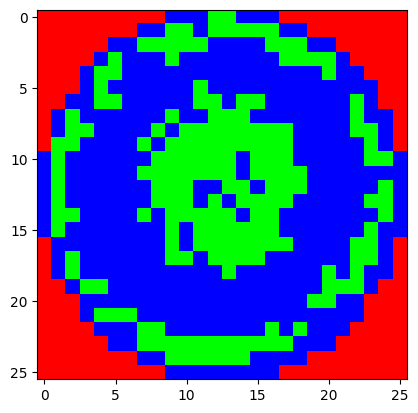

In [12]:
plt.imshow(df_donut.images.values[0].T)

<Axes: >

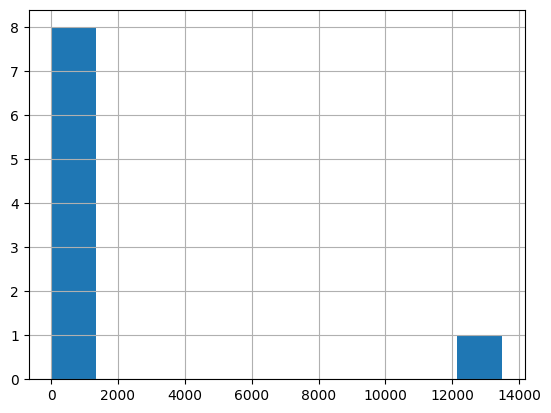

In [18]:
df.labels_items.value_counts().hist()

In [14]:
label_encoder = LabelEncoder()
df['labels_encoded'] = label_encoder.fit_transform(df['labels_items'])

In [31]:
df['labels_encoded'].value_counts()

labels_encoded
8    13489
4      297
2      296
0       90
6       74
7       72
3       31
5       16
1        1
Name: count, dtype: int64

In [32]:
df['labels_items'].value_counts()

labels_items
none         13489
Loc            297
Edge-Loc       296
Center          90
Random          74
Scratch         72
Edge-Ring       31
Near-full       16
Donut            1
Name: count, dtype: int64

In [16]:
X = np.array(df['images'].tolist())  # Convert image arrays to a numpy array
num_samples, channels, height, width = X.shape
X = X.reshape(num_samples, channels * height * width)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14362,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14363,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14364,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
# X = df.drop(['labels_items', 'labels_encoded'], axis=1)  # Features
Y = df['labels_encoded']  # Labels

sm = SMOTE(sampling_strategy='not majority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(X, Y)

oversampled = pd.concat([pd.DataFrame(oversampled_Y, columns=['labels_encoded']), pd.DataFrame(oversampled_X, columns=X.columns)], axis=1)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

In [20]:
import imblearn

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [61]:
Y = df['labels_encoded']
X_over, y_over = oversample.fit_resample(X, Y)

In [62]:
y_over.value_counts()

labels_encoded
8    13489
1    13489
4      297
2      296
0       90
6       74
7       72
3       31
5       16
Name: count, dtype: int64

In [33]:
X_over_donut = X_over[y_over==1]

In [35]:
X_over_donut.shape

(13489, 2028)

In [41]:
X_over_donut.to_numpy()

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [42]:
X_donut_image = X_over_donut.to_numpy().reshape(X_over_donut.shape[0], channels, height, width)

In [49]:
X_donut_image = list(map(lambda x: np.array(x), X_donut_image))

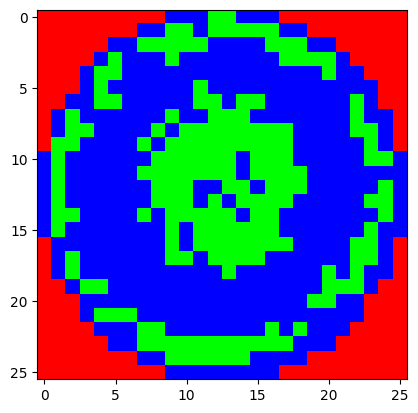

In [54]:
plt.imshow(X_donut_image[4].T)

In [60]:
(X_donut_image[1234] == X_donut_image[10]).all()

True

In [98]:
from sklearn.utils import resample

def make_resample(_df, column, sampler):

  dfs_r = {}
  dfs_c = {}
  bigger = 0
  ignore = ""
  for c in _df[column].unique():
    dfs_c[c] = _df[df[column] == c]
    if dfs_c[c].shape[0] > bigger:
      bigger = dfs_c[c].shape[0]
      ignore = c

  for c in dfs_c:
    if c == ignore:
      continue
    dfs_r[c] = sampler.fit_resample(dfs_c[c], )
  return pd.concat([dfs_r[c] for c in dfs_r] + [_df])



In [99]:
Y

0        8
1        8
2        8
3        8
4        8
        ..
14361    8
14362    8
14363    8
14364    8
14365    8
Name: labels_encoded, Length: 14366, dtype: int32

In [68]:
concat = pd.concat([X,Y], axis=1)

In [100]:
result = make_resample(concat, 'labels_encoded', oversample)

TypeError: BaseSampler.fit_resample() got an unexpected keyword argument 'random_state'

In [101]:
result.labels_encoded.value_counts()

labels_encoded
3    13489
2    13489
7    13489
6    13489
0    13489
4    13489
5    13489
1    13489
8    13489
Name: count, dtype: int64

In [97]:
result[result['labels_encoded']==7].iloc[0].value_counts()

10324
0.0    1352
1.0     676
7.0       1
Name: count, dtype: int64

In [103]:
result[result['labels_encoded']==1]

,0,1,2,3,4,5,6,7,8,9,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,labels_encoded
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [118]:
image = result[result['labels_encoded']==1].to_numpy()[:,:-1].reshape(-1,3,26,26)


In [122]:
(image[0]==image[1998]).all()

True

In [ ]:
plt.imshow(result.iloc[result['labels_encoded']==1][0])